## École Polytechnique de Montréal
## Département Génie Informatique et Génie Logiciel

## INF8460 – Traitement automatique de la langue naturelle - TP1

## Objectifs d'apprentissage: 

•	Savoir accéder à un corpus, le nettoyer et effectuer divers pré-traitements sur les données
•	Savoir effectuer une classification automatique des textes pour l’analyse de sentiments
•	Evaluer l’impact des pré-traitements sur les résultats obtenus


## Équipe et contributions 
Veuillez indiquer la contribution effective de chaque membre de l'équipe en pourcentage et en indiquant les modules ou questions sur lesquelles chaque membre a travaillé


Nom Étudiant 1: Luu Thien-Kim (1834378) 33.33%

Nom Étudiant 2: Mellouk Souhaila (1835144) 33.33%

Nom Étudiant 3: Younes Mourad (1832387) 33.33%

Nous avons tous travaillé ensemble sur chaque question

## Librairies externes

In [1]:
import os
import pandas as pd
from typing import List, Literal, Tuple

## Valeurs globales

In [2]:
data_path = "data"
output_path = "output"

## Données

In [3]:
def read_data(path: str) -> Tuple[List[str], List[bool], List[Literal["M", "W"]]]:
    data = pd.read_csv(path)
    inputs = data["response_text"].tolist()
    labels = (data["sentiment"] == "Positive").tolist()
    gender = data["op_gender"].tolist()
    return inputs, labels, gender

In [4]:
train_data = read_data(os.path.join(data_path, "train.csv"))
test_data = read_data(os.path.join(data_path, "test.csv"))

train_data = ([text.lower() for text in train_data[0]], train_data[1], train_data[2])
test_data = ([text.lower() for text in test_data[0]], test_data[1], test_data[2])

In [5]:
def getSentiment(data):
    sentimentList = []
    for sentiment in data:
        if sentiment:
            sentimentList.append("Positive")
        else:
            sentimentList.append("Negative")
    return sentimentList

## 1. Pré-traitement et Exploration des données

### Lecture et prétraitement

Dans cette section, vous devez compléter la fonction preprocess_corpus qui doit être appelée sur les fichiers train.csv et test.csv. La fonction preprocess_corpus appellera les différentes fonctions créées ci-dessous. Les différents fichiers de sortie doivent se retrouver dans le répertoire output.  Chacune des sous-questions suivantes devraient être une ou plusieurs fonctions.

In [6]:
train_path = os.path.join(data_path, "train.csv")
test_path = os.path.join(data_path, "test.csv")

train_phrases_path = os.path.join(output_path, "train_phrases.csv")
test_phrases_path = os.path.join(output_path, "test_phrases.csv")

#### 1) Segmentez chaque corpus en phrases, et stockez-les dans un fichier `nomcorpus`_phrases.csv (une phrase par ligne)

In [7]:
import nltk
nltk.download("punkt") 
nltk.download("wordnet")
import csv

def segmentSentences(path) :
    data = read_data(path)
    corpus = data[0]
    sentiment = getSentiment(data[1])
    if not os.path.isdir(output_path) :
        try:
            os.mkdir(output_path)
        except OSError:
            print ("Creation of the directory %s failed" % path)
        else:
            print ("Successfully created the directory %s " % path)
    newFilePath = output_path + '/' + os.path.splitext(os.path.basename(path))[0] + "_phrases.csv"
    file = open(newFilePath, "w")
    with open(newFilePath, "w") as f: 
        f.write("response_text" + ',' + "sentiment" + ',' + "op_gender" +'\n')
        for i in range(len(corpus)) :
            sentences = nltk.sent_tokenize(corpus[i])
            for sentence in sentences:
                sentence = sentence.replace('"', '""').replace('"', '""')
                f.write('"'+ sentence +'"' + ',' + '"' +sentiment[i]+ '"'+ ',' + '"'+data[2][i] + '"\n')
                
    return newFilePath


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/souhailamellouk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/souhailamellouk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
segmentSentences(train_path)
segmentSentences(test_path)

'output/test_phrases.csv'

#### 2) Normalisez chaque corpus au moyen d’expressions régulières en annotant les négations avec _Neg L’annotation de la négation doit ajouter un suffixe _NEG à chaque mot qui apparait entre une négation et un signe de ponctuation qui identifie une clause. Exemple : 
No one enjoys it.  no one_NEG enjoys_NEG it_NEG .

I don’t think I will enjoy it, but I might.  i don’t think_NEG i_NEG will_NEG enjoy_NEG it_NEG, but i might.

In [9]:
def getPath(path) :
    if "train" in path :
        path = train_path
    elif "test" in path :
        path = test_path
        
    return path

In [10]:
import re

def normalize(path) :
    with open(path, "r") as f :
        data = list(f)
    
    newFilePath = output_path + '/' + os.path.splitext(os.path.basename(getPath(path)))[0] + "_negation.csv"
    file = open(newFilePath, "w")
    with open(newFilePath, "w") as f:
        for sentence in data:
            match = re.sub("(?i)(?<=not |n't | no )(.*?[,.(?!;]+)", lambda m: m.group(1).replace(" ", "_NEG ")
                           .replace(".", "_NEG.").replace(",", "_NEG,").replace("?", "_NEG?").replace("!", "_NEG!")
                           .replace("(", "_NEG(").replace(";", "_NEG;"), sentence)
            second_match = re.sub("(?<=No |NO )(.*?[,.(?!;]+)", lambda m: m.group(1).replace(" ", "_NEG ")
                           .replace(".", "_NEG.").replace(",", "_NEG,").replace("?", "_NEG?").replace("!", "_NEG!")
                           .replace("(", "_NEG(").replace(";", "_NEG;"), match)
            print(second_match)
            f.write(match)     
    return newFilePath
            

In [11]:
normalize(train_phrases_path)
normalize(test_phrases_path)

response_text,sentiment,op_gender

"I don't think_NEG any_NEG one_NEG there_NEG has_NEG EBOLA_NEG Bob_NEG Latta_NEG You_NEG should_NEG be_NEG back_NEG in_NEG Washington_NEG actually_NEG getting_NEG something_NEG done_NEG there_NEG on_NEG the_NEG House_NEG floor_NEG.","Negative","M"

";-)...anything other than jeans and t-shirts are superfluous, by the way.","Negative","M"

"'Update your wardrobe'...pfft.","Negative","M"

"Meh, I could only get to 8.","Negative","M"

"Need to work up.","Negative","M"

"A bill consisting of a single sentence.","Positive","M"

"Very well done, sir.","Positive","M"

"So far, so good.","Positive","W"

"Thx !","Positive","W"

"My buddy Jeff Johnson was your prop master on that.","Positive","W"

"she had me at everlasting youth.","Positive","W"

"Congratulations to you for a well deserved recognition!","Positive","M"

"baffoon, idiot, dumb.","Negative","W"

"The intelegent conversation continues.......","Negative","W"

"They don't deserve_NEG that_NEG honour_


"Regards, """"Bud""""","Positive","M"

"interesting and promising technology.","Positive","W"

"wish her the best!!","Positive","W"

"with regards.","Positive","W"

"arshedwireless@yahoo.com","Positive","W"

"No problem_NEG and_NEG thanks_NEG for_NEG following_NEG back_NEG!","Positive","M"

":)","Positive","M"

"You keep kicking tail and I'll keep sending props!","Positive","M"

"Im trying to eat here guys","Negative","M"

"Now THAT is a flight I will book routinely.","Positive","W"

"Right on!","Positive","W"

"I am convinced that way too many people who live in the Southwest, where I have lived and worked most of my life, have allowed the sun to boil their brain cells.","Negative","M"

"The problem is, some people will watch a video like this and assume that Specter is """"in"""" on the conspiracy.","Negative","M"

"Somehow the good swami contrives to be both spiritual and unarguably accurate.","Positive","M"

"There is no other_NEG way_NEG to_NEG see_NEG this_NEG that_NEG gets_NEG 

"Good luck with your new office.","Positive","M"

"Nice!","Positive","W"

"I love seeing the kids clamoring for your autograph.","Positive","W"

"So everything, basically haha","Positive","M"

"WTF is up with the give away in the farm bill to insurance companies and rich farmers including members of congress while cutting snap and heating assistance?","Negative","M"

"congrats!","Positive","W"

"that's great news!","Positive","W"

"Wow!!","Positive","W"

"Bellissimo taglio di capelli!","Positive","W"

"I feel soo inspired with hope for the future.","Positive","W"

"Hillary is NOT perfect_NEG but_NEG she_NEG has_NEG the_NEG track_NEG record_NEG of_NEG getting_NEG stuff_NEG done_NEG.","Positive","W"

"I""""m with her!!","Positive","W"

"!","Positive","W"

"This would not have_NEG been_NEG possible_NEG if_NEG it_NEG wasn't_NEG the_NEG Webb"_NEG,"Positive","W"

"Kira kosarin como siempre teves muy hermosa","Positive","W"

"Lol, tell me about it!","Positive","M"

"Yeah I heard u r a great s

"That woman is pathological and will never ever change her lie about Zanny, etc.","Negative","W"

"Why bother trying even!","Negative","W"

"thanks for following back!","Positive","W"

"looking good, keep up the good work!","Positive","W"

"Support HR38.","Positive","M"

"This is our chance let's get it done.","Positive","M"

"Thanks!","Positive","M"

"Yours is pretty awesome too!","Positive","M"

"No one_NEG works_NEG harder_NEG for_NEG the_NEG middle_NEG class_NEG than_NEG Senator_NEG Menendez_NEG.","Positive","M"

"I appreciate you.","Positive","W"

"You are impressive!","Positive","W"

"Innocence is one of your best books!!!","Positive","M"

"!","Positive","M"

"Hi!","Positive","W"

"Happy to follow as well!","Positive","W"

"I noticed your recent post, so checked out your workouts & activities and I thought I really should follow you.","Positive","W"

"You do real solid work!I'm looking forward to propping & commenting on more of your activities in the near future!","Positive","W"


"Fantastic!","Positive","M"

"Life is really Good!","Positive","M"

"Hehe, nice, keep at it bro","Positive","M"

"Brit please check UPI Electoral College vote map for today.","Positive","M"

"Trump is ahead and probably will win the election please check the UPI poll","Positive","M"

"Obama wants to hurt us bad for sure..How can you be for anyone like Obama, Reid..","Negative","W"

"Geraldo - You said this the first terrorist attach since 9/11 on US soil.","Negative","M"

"What was the Fort Hood shooting and killing of so many people?","Negative","M"

"yay!","Positive","M"

"I was a major river rat for some time, but only rafting and sit-on-top kayaking.","Positive","M"

"this is my first time getting into self-rescue kayak training.","Positive","M"

"I love it!","Positive","M"

"gonna go murdah some whitewater this spring!","Positive","M"

"Wow, other than being the luckiest guy in the world I'm not sure_NEG who_NEG that_NEG dude_NEG is_NEG.","Positive","W"

"I could have got an ice 


"That is because I haven't been_NEG doing_NEG anything_NEG :P_NEG going_NEG to_NEG restart_NEG soon_NEG, only a month and a half until I start doing roller derby","Positive","M"

"Thanks!","Positive","M"

"You as well.","Positive","M"

"See u in Madrid!","Positive","W"

"Will support you and wave the USA flag.","Positive","W"

"G Morning Beautiful Daniella !!!","Positive","W"

"Have a great Monday !!","Positive","W"

"Cafecito?","Positive","W"

"Besos!!","Positive","W"

"!","Positive","W"

"haha you missed them because they're not supposed_NEG to_NEG show_NEG up_NEG for_NEG non-heroes_NEG :)_NEG they're_NEG showing_NEG up_NEG because_NEG of_NEG a_NEG bug_NEG on_NEG the_NEG individual_NEG comments_NEG page"_NEG,"Positive","M"

"wow, not bad_NEG at_NEG all_NEG for_NEG my_NEG first_NEG Ted_NEG talk_NEG ^^"_NEG,"Positive","W"

"Why blame the senior people why not the_NEG people_NEG doing_NEG it_NEG.","Negative","W"

"VA rules allow unqualified veterans to use VA hospital stop that and hal

"I fucking GUARANTEE I would never buy or rent a copy of any of the Transformers movies... but I would torrent it for a larf.","Negative","W"

"Haha!","Positive","W"

"Yes....always a challenge!","Positive","W"

"=} and!","Positive","W"

"how cute and badass are you?","Positive","W"

"Lovin this pic....first time evah I saw your face!","Positive","W"

"Hey........we should write a song......","Positive","W"

"God Bless you Kamala, grateful we have you in CA...","Positive","W"

"Sure I will!","Positive","M"

":) and thank you!","Positive","M"

"This talk could change my life.","Positive","W"

"Thank you, Amy","Positive","W"

"Thank you Congresswoman Dina!","Positive","W"

"!","Positive","W"

"Shutting down social media/communications is how we do it in the human world.","Positive","W"

"Quite fascinating!","Positive","W"

"No such_NEG thing_NEG as_NEG a_NEG pro_NEG that_NEG would_NEG camp_NEG.","Negative","M"

"Its more just having a standstill in general.","Negative","M"

"Went to that

"Thanks!","Positive","M"

"Catherine Gayle Thrash wish I was up there with you.","Positive","W"

"Definitely going next summer!","Positive","W"

"How can we trust any federal politicians at all?","Negative","M"

"Wealth inequality keeps getting worse and worse and worse and they won't even_NEG raise_NEG the_NEG minimum_NEG wage_NEG.","Negative","M"

"right back at ya tyra","Positive","W"

"Ty snd happy to do so!","Positive","W"

"nice picture Brianne Davis pretty","Positive","W"

"Be radical in those comments and implore your colleagues to do what is right by the people they represent!","Negative","M"

"All the luck in the world bless you.","Positive","M"

"So, we share our birthday month.","Positive","W"

"I like sharing it with you.","Positive","W"

"You're so very inspiring.","Positive","W"

"God bless you Congresswoman Clarke","Positive","W"

"Awesome, I love it!","Positive","W"

"Both the hair color and the glasses :)","Positive","W"

"I love 'CRAP' as an acronym.","Positive","M"


"QUE BIEN!!!...","Positive","W"

"DUNIA TE IMAGINO AHI_NEG JUGUETEANDO_NEG CON_NEG ELLAS_NEG AMOROSA_NEG, Y LINDA COMO MAM!!","Positive","W"

"!...Deseo pases un bonito y maravilloso domingo, llenisimo de amor!!!...","Positive","W"

"""""Angelitos bellos""""!!","Positive","W"

"!","Positive","W"

"Law Enforcers put peoples lives on the line everyday to protect their jobs...gang members with badges!!!!!","Negative","W"

"!","Negative","W"

"You win inane comment of the day.","Positive","M"

"Inane as fuck, man!","Positive","M"

"Oh geez!","Positive","M"

"Hardly a legend but certainly an old-timer, lol!","Positive","M"

"I was on Fito when it was uphill to school both ways!","Positive","M"

";) I love making new friends here and finding ways to keep inspired.","Positive","M"

"The honour is mine.","Positive","M"

"Watched it this morning...but hey, it's the bryan bros so they're basically unbeatable at doubles.","Positive","M"

"Rock that hair do in Wimby!!","Positive","W"

"You go BMS!

"The creative process is as individual as that which we create.","Positive","W"

"Art gives us a view into the artist's world as well as asks us to look at our own differently.","Positive","W"

"I'm mad most at the father, """"Its not her_NEG fault""""_NEG This_NEG is_NEG the_NEG pinnacle_NEG of_NEG being_NEG her_NEG fault_NEG!","Negative","M"

"Good job Tammy.","Positive","W"

"That is why Wi.","Positive","W"

"voters put you in the Senate!!","Positive","W"

"!","Positive","W"

"Great to see you today in Cedartown!","Positive","M"

"Go Tom, GO!","Positive","M"

":D","Positive","M"

"Hurry up next Sunday in Baltimore!!!!!","Positive","M"

"Woo woo!!!!","Positive","M"

"Hey--are we allowed to take pictures????","Positive","M"

"?","Positive","M"

"HAPPY VETERANS DAY!!","Positive","M"

"!","Positive","M"

"What this system seems to create is a sort of overly-complicated bio-engineered concrete.","Negative","W"

"Instead of having people or build or rebuild our structures, it will be done

"SUPER HERO STATUS!","Positive","W"

"YES!!","Positive","W"

"You did a great job and I can't wait_NEG to_NEG see_NEG your_NEG new_NEG show_NEG when_NEG it_NEG premieres_NEG!","Positive","W"

":o]","Positive","W"

"Great!","Positive","M"

"I love this topic St.John cannot give_NEG a_NEG final_NEG answer_NEG though_NEG, everybody who is succesful is passionate adn persistent etc.etc.","Positive","M"

"But everybody who is passionate and persistent etc etc is not necessirally_NEG succesful_NEG._NEG._NEG.Nevertheless inspiring..","Positive","M"

"Hahaha we like the good things in life :) And no problem_NEG :)"_NEG,"Positive","W"

"sicko, pervert!!!!","Negative","M"

"you think little girls should look at your penis???","Negative","M"

"and everyone else with a penis?????","Negative","M"

"Pervert shut up get of the air!","Negative","M"

"Thanks for engineering the dam!","Positive","M"

"enjoyed it.yes we need to believe in superior power .ONLY ONE superior power is there ,we should believ


"Sorry John Kowalski, but you're just wrong.","Negative","W"

"thanks!","Positive","W"

"i appreciate it very much.","Positive","W"

"good luck with your goals.","Positive","W"

"what type of bike do you have?","Positive","W"

"Congratulations Congressman Webster!!","Positive","M"

"We are happy for all of you!","Positive","M"

"!","Positive","M"

"No worries_NEG, thanks for the props!","Positive","M"

"Latrice Smith this is perfect","Positive","W"

"If you go to 14:30 you will realize something funny: Half a million people have watched a film of a guy, watching a film of a guy, watching a film of a guy, who is changing oil.","Positive","M"

"I think that is somehow surreal.","Positive","M"

"indeed, i don't understand_NEG why_NEG people_NEG would_NEG want_NEG to_NEG display/wear_NEG another_NEG animal's_NEG skin_NEG, and i never will.","Positive","W"

"diversity in these populations is decreasing as well... on a happier note, the little touch at the end was cute, grandparents!","Posi

'output/test_negation.csv'

#### 3) Segmentez chaque phrase en mots (tokenisation) et stockez-les dans un fichier `nomcorpus`_mots.csv. (Une phrase par ligne, chaque token séparé par un espace, il n’est pas nécessaire de stocker la phrase non segmentée ici) ;

In [12]:
def tokenize(path) :
    sentences = []
    
    data = read_data(path)
    corpus = data[0]        
    sentiment = getSentiment(data[1])
    newFilePath = output_path + '/' + os.path.splitext(os.path.basename(getPath(path)))[0] + "_mots.csv"
    file = open(newFilePath, "w")
    with open(newFilePath, "w") as f: 
        f.write("response_text" + ',' + "sentiment" + ',' + "op_gender" +'\n')
        for i in range(len(corpus)) :
            listTokens = nltk.word_tokenize(corpus[i])
            tokens = ' '.join(listTokens)
            f.write('"' + tokens + '"' + ',' + '"' + sentiment[i]+ '"'+ ',' + '"' + data[2][i] + '"\n')
                
    return newFilePath

In [13]:
tokenize(train_phrases_path)
tokenize(test_phrases_path)

train_mots_path = os.path.join(output_path, "train_mots.csv")
test_mots_path = os.path.join(output_path, "test_mots.csv")

#### 4) Lemmatisez les mots et stockez les lemmes dans un fichier `nomcorpus`_lemmes.csv (une phrase par ligne, les lemmes séparés par un espace) ;

In [14]:
def lemmatize(path) :
    with open(path, "r") as f :
        data = list(f)
        
    newFilePath = output_path + '/' + os.path.splitext(os.path.basename(getPath(path)))[0] + "_lemmes.csv"
    lemmzer = nltk.WordNetLemmatizer()
    
    file = open(newFilePath, "w")
    with open(newFilePath, "w") as f: 
        for sentences in data :
            lemmes = [lemmzer.lemmatize(token) for token in sentences.split()]
            sentences = ' '.join(lemmes)
            f.write(sentences+'\n')
                
    return newFilePath

In [15]:
lemmatize(train_mots_path)
lemmatize(test_mots_path)

'output/test_lemmes.csv'

#### 5) Retrouvez la racine des mots (stemming) en utilisant nltk.PorterStemmer(). Stockez-les dans un fichier `nomcorpus`_stems.csv (une phrase par ligne, les racines séparées par une espace) ;

In [16]:
def stemmize(path) :    

    data = read_data(path)
    corpus = data[0]        
    sentiment = getSentiment(data[1])
        
    path = getPath(path)
    newFilePath = output_path + '/' + os.path.splitext(os.path.basename(path))[0] + "_stems.csv"
    
    stemmer = nltk.PorterStemmer()
    
    file = open(newFilePath, "w")
    with open(newFilePath, "w") as f:
        f.write("response_text" + ',' + "sentiment" + ',' + "op_gender" +'\n')
        for i in range(len(corpus)) :
            stems = [stemmer.stem(token) for token in corpus[i].split()]
            sentences = ' '.join(stems)
            f.write('"' + sentences + '"' + ',' + '"' + sentiment[i]+ '"'+ ',' + '"' + data[2][i] + '"\n')
                
    return newFilePath
    

In [17]:
stemmize(train_mots_path)
stemmize(test_mots_path)

'output/test_stems.csv'

#### 6) Ecrivez une fonction qui supprime les mots outils (stopwords) du corpus. Vous devez utiliser la liste de stopwords de NLTK ;

In [18]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords.words("english")

def deleteStopWords(path) :

    data = read_data(path)
    corpus = data[0]        
    sentiment = getSentiment(data[1])
        
    path = getPath(path)
    newFilePath = output_path + '/' + os.path.splitext(os.path.basename(path))[0] + "_stopWords.csv"
    stopwords_english = set(stopwords.words("english"))
    output = []
    
    file = open(newFilePath, "w")
    with open(newFilePath, "w") as f: 
        f.write("response_text" + ',' + "sentiment" + ',' + "op_gender" +'\n')
        for i in range(len(corpus)) :
                newSentence = [token for token in nltk.word_tokenize(corpus[i]) if token not in stopwords_english]
                sentences = ' '.join(newSentence)
                output.append(sentences)
                f.write('"' + sentences + '"' + ',' + '"' + sentiment[i]+ '"'+ ',' + '"' + data[2][i] + '"\n')
                
    return output
                
#enlever la création de nouveaux fichiers
    

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/souhailamellouk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
deleteStopWords(train_mots_path)
deleteStopWords(test_mots_path)

['Thanks back !',
 'Yep , University Alberta .',
 'You live around ?',
 "please n't sell land Steve",
 'shaking head ignorance deliberate ignoring facts FDR , Pearl Harbor , WWII .',
 'To contemplated tri , perhaps ?',
 'Pshh ... Is treat props .. Just go around deleting ? ! ? !',
 'Sureeeeeeeeeeeeeeeeeeee I see .',
 ": pYeah 's definitely still bugs around .",
 "My workout last night posted today 's date .",
 'lol',
 'Thanks !',
 'I also love bacon .',
 ': )',
 'Hello Isaac !',
 "My copy arrived yesterday France , I 'm happy excited read ! ! !",
 'XD',
 'We need keep Bob Menendez congress .',
 "It 's really excellent lecture , I believe her.so , fake till make !",
 "I 'm human according questions .",
 'And tone great , I lot fun : )',
 "You 're awesome ! !",
 '!',
 'B Mattek awesome , I love bad girl risque style .',
 "Brit : I 'm glad u r Fox tonight .",
 'You calm people bring common sense .',
 'You class act !',
 '!',
 'Good luck .',
 'I really hope make .',
 'Please reach Mr. Trum

#### 7) Écrivez une fonction preprocess_corpus(corpus) qui prend un corpus brut stocké dans un fichier.csv, effectue les étapes précédentes, puis stocke le résultat de ces différentes opérations dans un fichier corpus _norm.csv

In [20]:
def preprocess_corpus(input_file: str, output_file: str) :
    #to do : vérifier si c'est bien le résultat voulu
    data = read_data(input_file)
    corpus = data[0]        
    sentiment = getSentiment(data[1])
    
    results = deleteStopWords(stemmize(lemmatize(tokenize(normalize(segmentSentences(input_file))))))
    print(results)
    file = open(output_file, "w")
    with open(output_file, "w") as f:
        f.write("response_text" + ',' + "sentiment" + ',' + "op_gender" +'\n')
        for element in results :
            r = element.replace('"', '""').replace('"', '')
            f.write('"' + r + '"\n')
            
    

In [21]:
preprocess_corpus(
   os.path.join(data_path, "train.csv"), os.path.join(output_path, "train_norm.csv")
)
preprocess_corpus(
   os.path.join(data_path, "test.csv"), os.path.join(output_path, "test_norm.csv")
)

response_text,sentiment,op_gender

"I don't think_NEG any_NEG one_NEG there_NEG has_NEG EBOLA_NEG Bob_NEG Latta_NEG You_NEG should_NEG be_NEG back_NEG in_NEG Washington_NEG actually_NEG getting_NEG something_NEG done_NEG there_NEG on_NEG the_NEG House_NEG floor_NEG.","Negative","M"

";-)...anything other than jeans and t-shirts are superfluous, by the way.","Negative","M"

"'Update your wardrobe'...pfft.","Negative","M"

"Meh, I could only get to 8.","Negative","M"

"Need to work up.","Negative","M"

"A bill consisting of a single sentence.","Positive","M"

"Very well done, sir.","Positive","M"

"So far, so good.","Positive","W"

"Thx !","Positive","W"

"My buddy Jeff Johnson was your prop master on that.","Positive","W"

"she had me at everlasting youth.","Positive","W"

"Congratulations to you for a well deserved recognition!","Positive","M"

"baffoon, idiot, dumb.","Negative","W"

"The intelegent conversation continues.......","Negative","W"

"They don't deserve_NEG that_NEG honour_

"Stop pushing this myth that's been disproven over and over again.","Negative","W"

"Enforce the laws on the books and impose stiff penalties to protect our communities.","Negative","W"

"Love your hikes, i'm planning on going on a 45km hike in 3 weeks actually!","Positive","W"

"Disappointed that finding answers about Bridgegate seems to be more important than finding answers about Benghazi-gate.....where are our priorities?","Negative","M"

"Awesome talk!","Positive","M"

"I think its brilliant, our cities are where we look for innovation and new things in many, arguably almost all areas.","Positive","M"

"It only makes sense to make our cities somewhere to be proud of, something to look up to!","Positive","M"

"drink more coffee.... it will kill your appetite.","Positive","M"

":)","Positive","M"

"you're a few minutes early....look above.","Positive","M"

":D","Positive","M"

"Thanks!","Positive","W"

"You'll get there!","Positive","W"

"Awesome dog in your profile picture.","Posit


"Another thing Obama hides from the Americans.","Negative","M"

"To a very talented artist performer dancer choreographer and so much more may you have a Happy Birthday today as well as a Happy Father's Day as well!!","Positive","W"

"!","Positive","W"

"I like the idea of urban bee keeping but the problem is if you live in a country that has long winters, the plants all drop their flowers and leaves, with little diversity in most urban settings the bees would have to be moved.","Negative","M"

"Congressman Cassidy you have my support and about 90 % of my constituents support you also!!","Positive","M"

"!","Positive","M"

"Do corporations raise wages when government """"gets out of the way""""?","Negative","M"

"http://www.pewresearch.org/fact-tank/2014/10/09/for-most-workers-real-wages-have-barely-budged-for-decades/","Negative","M"

"you are absolutely beautiful and sexy in every way, I love you","Positive","W"

"Hmm... could it POSSIBLY be from all the GMOs??","Negative","W"

"?",


"So, it is important for us to embrace our vulnerability.","Positive","W"

"Wish she was in Ohio...maybe I should just move to W.Va.!","Positive","W"

"Thanks for the follow back!","Positive","W"

":)","Positive","W"

"Haha... and then Scottie tells him to sit your ass down.","Positive","M"

"You gotta love Spike for his love of the game and team tho.","Positive","M"

":D","Positive","M"

"David -- I hope you're considering running for the Senate.","Positive","M"

"SWeet co co i love u","Positive","W"

"Go for it kid, do it just like I did - love it.","Positive","M"

"I'm proud of you amy and your coach is too!","Positive","W"

"This is truly amazing technology.","Positive","M"

"I can't wait_NEG until_NEG people_NEG that_NEG are_NEG animated_NEG in_NEG this_NEG way_NEG actually_NEG touch_NEG the_NEG ground_NEG.","Positive","M"

"You should be standing up for all women!","Negative","W"

"Support Planned Parenthood, ACA, Social Security, and Medicare.","Negative","W"

"We don't have_NE

"He sounds like a cartoon character.","Positive","M"

"Now your picture makes sense!","Positive","W"

"I love it!","Positive","W"

"Well, hey, thanks for following me!","Positive","W"

"I see you've been on fito for a while... Hopefully the sense of community will drive you ever further to do awesome things like pick up heavy bars and such.","Positive","W"

":D And thanks.","Positive","W"

"Hello Soror, I saw you last night at President Obama's speech...you made me proud and the entire sorority of DST","Positive","W"

"intresting and inspiring","Positive","W"

"Yep, since about December 2011.","Positive","M"

"It's great for ideas and encouragement!","Positive","M"

"Keep up the good work.","Positive","W"

"Don't let_NEG them_NEG get_NEG you_NEG down_NEG.","Positive","W"

"Oh, wait, I remember the last electon.","Positive","W"

"Stand Tall!","Positive","W"

"Im thnkfull dat God protectd me nd ma famly nd he has blessd us,may he continue blessing nd healin de fmly nd de world....","Posi

"Pretty much the same as any other online game nowadays really \\\_()_/","Negative","W"

"Started lifting again Bro!","Positive","W"

":D","Positive","W"

"sing cat in the snow please","Positive","W"

"Yeah I definitely agree.","Positive","M"

"I know its the first thing I looked for though, so figured Id let anyone that was curious know","Positive","M"

"Kudos for not feeding_NEG the_NEG troll_NEG, folks!","Positive","W"

"And go Tammy!","Positive","W"

"Congratulations Marion Stillson!","Positive","M"

"You're welcome man!","Positive","M"

"Dang I should have done 1 more just to get you to 20 props :P","Positive","M"

"Looking good there bitsie and the pooch","Positive","W"

"Absolutely a beautiful picture!","Positive","M"

"Agreed.","Positive","W"

"She needs to be given more to do.","Positive","W"

"Happy Easter to you and family.","Positive","W"

"So good.","Positive","M"

"Also check out his book, """"The Art of Possibility"""" http://benjaminzander.com/book/","Positive","M"

"Ve


"Wow I hope you will get to t his and cut out some of the duplication and the CZARS particuliarly.","Negative","M"

"The move to socialism is unreal.","Negative","M"

"I never thought I would see this day.","Negative","M"

"Keep up the good work!","Positive","W"

"Thank you!","Positive","W"

"!","Positive","W"

"Thanks!","Positive","W"

";))) Yeah any flat wall makes me happy at this point, the possibilities for fun are just everywhere.","Positive","W"

"Now I've gotta learn parkour or something ;)","Positive","W"

"been sick and working till 11pm... :(","Negative","W"

"Thank you for standing up for this right, Pramila.","Positive","W"

"You're the best!","Positive","W"

"Nothing that earns points is what the rest of the group is hoping :)","Positive","M"

"Very Nice my dear......I want to talk with you on massenger","Positive","W"

"Don't worry_NEG man_NEG, I am not gonna_NEG be_NEG able_NEG to_NEG hit_NEG the_NEG gym_NEG all_NEG week_NEG._NEG._NEG.you will leave me in the dust in n

";)","Positive","W"

"Thanks for the good wishes!","Positive","W"

"Will let you know how it goes :)","Positive","W"

"mod me and ill suppress all mccain apologia","Positive","W"

"dont just like the pic but for such a young lady you are looking great","Positive","W"

"This is amazing!","Positive","W"

"The kind of thing that makes me want to use my journalism and creative arts skills to teach children.","Positive","W"

"I would like to meet the founder one day to see how we can make this an even bigger campaign.","Positive","W"

"I, too, am a product of the I can bug.","Positive","W"

"This was great.","Positive","W"

"It really reminded me of the book Siddartha.","Positive","W"

"Thankful for great minds in Congress that are aware of the need for being grateful, thanking you personally as one of those.","Positive","M"

"Thanks!","Positive","M"

"Love the courage wolf on your profile, he's my favorite.","Positive","M"

"Tammy, I would like to hear your position on NDAA...how would you


":-) Happy endings!","Positive","W"

"It was completely random.","Negative","M"

"He undressed 100 yards away and charged my van, then flipped, jumping onto my neighbors car.","Negative","M"

"Fun times can be exhausting.","Positive","W"

"Luv your show","Positive","W"

"Ignorant trash like Mike Stricklin don't know_NEG enough_NEG about_NEG our_NEG form_NEG of_NEG government_NEG to_NEG keep_NEG it_NEG classy_NEG.","Negative","W"

"Maybe he'd be happier in Somalia.","Negative","W"

"8 minutes of running though was 110 points.","Positive","M"

"Just keep up that level of intensity!","Positive","M"

"Its 2015Im pretty sure doing anything in MS-DOS counts as broke.","Negative","M"

"with you on that billie GO GET EM KYRSTEN,SEND THEM PACKING!","Positive","W"

"Yep ... but think of how nice it is to know that the senate will never let that happen!","Positive","W"

"really goes to show some people are assholes :/ I know it means little from a anonymous person but I apologize for their actio


"But I wish it was on the Working Families Party line, a Teachout/Hochul ticket.","Negative","W"

"I do not trust_NEG Andrew's_NEG promises_NEG to_NEG be_NEG a_NEG real_NEG Democrat_NEG.","Negative","W"

"Once a DINO, always a DINO!","Negative","W"

"hey thanks for the return props =) nice monkey in your PP haha","Positive","M"

"May he dwell in The House of The Lord, forever.","Positive","W"

"He WILL be missed.","Positive","W"

"Damn that is some trippy shit.","Positive","M"

"I remember when they said some day they will have voice recognition or that they could make a robot walk in a bi pod manner.","Positive","M"

"Wow now this too cool.","Positive","M"

"Congrats to u Mrs Demings on your win.","Positive","W"

"Oh, it's over.","Positive","W"

"Thanks for playing.","Positive","W"

":)","Positive","W"

"Great article pretty woman","Positive","W"

"Thanks Cathy, and the same to you.","Positive","W"

"Would love to see pictures of your kiddos in costume!","Positive","W"

"Your proposa


">:D","Positive","W"

"We need people like you in our Government!","Positive","M"

"Duffy2010","Positive","M"

"No words_NEG to_NEG his_NEG ignorance_NEG.","Negative","M"

"Unbelievable.","Negative","M"

"Smh.","Negative","M"

"You almost made me cry, Monica...","Positive","W"

"Thank you for share your story :D XOXO","Positive","W"

"Youre totally right.","Positive","M"

"Add to the fact that voters cant watch every CFB game, and theyre forced to make do with highlights.","Positive","M"

"How many times to you see an OL make ESPNs Top 10?","Positive","M"

"Players that touch the ball more are going to get more attention, more votes.","Positive","M"

"Thats the nature of the game.","Positive","M"

"This is wonderful.","Positive","W"

"I am curious can this system also learn """"thoughts"""" other than motions?","Positive","W"

"What about emotion like love, pain...Will this kind of tech one day portrait what we have in mind in a screen?","Positive","W"

"Thanks Ryan Zinke finally some

"They did GOOD Congressman Congressman Drew Ferguson!","Positive","M"

":) My brother was ECSTATIC!!!!!","Positive","M"

":)","Positive","M"

"Donkey punch right in the pussy","Negative","M"

"That kinda grosses me out, lol","Negative","W"

"And may our politics also be inspired by his example and that of the rest of the professional diplomatic corps.","Positive","M"

"Love, loves, love you and the show Great article","Positive","W"

"Thank YOU!","Positive","M"

"I'm so inspired now!","Positive","M"

"Rep. Steve Stivers what have you found out about Chemtrails?","Negative","M"

"What are you doing about it?","Negative","M"

"While you are at it, please stop HAARP and Agenda 21.","Negative","M"

"Please step up and do the right thing.","Negative","M"

"No one_NEG is_NEG a_NEG throw_NEG away_NEG._NEG._NEG._NEG.each life is given to enhance the rest of us.","Positive","W"

"No problem_NEG!","Positive","M"

"Merry Christmas to you, too!","Positive","M"

"I fucking love this guy.","Positive

"Sweet pictures.","Positive","W"

"No worries_NEG.","Positive","W"

"Nice session you posted tonight.","Positive","W"

"Now get some sleep!","Positive","W"

"--She will be Top Notch , Give her a Raise Immediately","Positive","M"

"how much stimulus money was spent on the boathouse for the waterway boats?","Negative","M"

"things like that are what's wrong with our country.","Negative","M"

"I feel blessed and so thankful I have all of my senses.","Positive","M"

"I wish Chris could have mentioned some of his works that make the city more blind friendly.","Positive","M"

"I'm actually really curious how his architectural career had changed since he went blind.","Positive","M"

"Thanks!","Positive","M"

"We love Reddit and been big fans since yall discovered us some time ago.","Positive","M"

"We also have a website statistical program that shows traffic and where it comes from.","Positive","M"

"That is how we knew about this thread and more importantly, how I know where you are...right

['thank back !', 'yep , univers alberta .', 'live around ?', "pleas n't sell_neg my_neg land_neg steve_neg", 'shake head ignor deliber ignor fact fdr , pearl harbor , wwii .', 'To contempl dure tri , perhap ?', 'pshh ... Is treat prop .. go around delet ? ! ? !', 'sureeeeeeeeeeeeeeeeeee I see .', ": pyeah 's definit still bug around .", "My workout last night post today 's date .", 'lol', 'thank !', 'I also love bacon .', ': )', 'hello isaac !', "My copi arriv yesterday franc , I 'm happi veri excit read ! ! !", 'XD', 'We need keep bob menendez congress .', "It 's realli excel lectur , I believ her.so , fake till make !", "I 'm human accord question .", 'hi tone wa great , I lot fun : )', "'re awesom ! !", '!', 'B mattek awesom , I love bad girl risqu style .', "brit : I 'm glad u r fox tonight .", 'calm peopl bring common sens thi .', 'class act !', '!', 'good luck .', 'I realli hope make .', 'pleas reach mr. trump !', 'thank feedback !', 'ill sure check phrase next time : )', 'thi ta

### Exploration des données

#### 1)

Complétez les fonctions retournant les informations suivantes (une fonction par information, chaque fonction prenant en argument un corpus composé d'une liste de phrases segmentées en tokens(tokenization)) ou une liste de genres et une liste de sentiments:

In [22]:
corpus = [['soso.', 'kim a acheté un mbp13 silver!', 'mourad a acheté un mbp16 spacegrey']]
corpus = [['soso', 'a', 'acheté', 'un', 'mbp16', 'silver', '.', 'Je', 'ne', 'suis', 'pas', 'daccord!'],
          ['kim', 'a', 'acheté', 'un', 'mpb13', 'silver','.'], 
          ['mourad', 'a', 'acheté', 'un', 'mbp16', 'spacegrey', '.', 'Quil', 'aime', 'beaucoup']]
corpus = [["I", "do", "not", "agree_NEG", "with_NEG", "this_NEG!", "I", "prefer", "the", "other", "option"],
           ["I", "really", "like", "that", "new", "mbp16", "Mourad", "made", "a", "good", "choice"],
           ["I", "don't", "think_NEG", "that_NEG.", "I", "prefer", "the", "mbp13"]]

In [23]:
#Return if the corpus is tokenized or not
def isTokenized(corpus) :
    for sentences in corpus :
        for sentence in corpus :
            for l in sentence :
                if ' ' in l :
                    return 0
    return 1

In [24]:
#Return the corpus as a list of documents, that are not tokenizated, but segmented in sentences
def getListOfSentences(corpus):
    listOfDocs = []
    listOfTokens = []
    if isTokenized(corpus) :
        for sentences in corpus :
            for token in sentences :
                listOfTokens.append(token)
            s = ' '.join(listOfTokens)
            s = nltk.sent_tokenize(s)
            listOfDocs.append(s)
            listOfTokens = []
    return listOfDocs

In [25]:
getListOfSentences(corpus)

[['I do not agree_NEG with_NEG this_NEG!', 'I prefer the other option'],
 ['I really like that new mbp16 Mourad made a good choice'],
 ["I don't think_NEG that_NEG.", 'I prefer the mbp13']]

##### a. Le nombre total de tokens (mots non distincts)

In [26]:
def getNumberOfTokens(corpus):
    corpus = getListOfSentences(corpus)
    count = 0
    for sentences in corpus :
        for sentence in sentences :
            count = count + len(nltk.word_tokenize(sentence))
    return count

In [27]:
getNumberOfTokens(corpus)

33

##### b. Le nombre total de types

In [28]:
def getNumberOfTypes(corpus):
    corpus = getListOfSentences(corpus)
    listOfTokens = []
    for sentences in corpus :
        for sentence in sentences :
            tokenList = nltk.word_tokenize(sentence)
            for token in tokenList :
                listOfTokens.append(token)
    listOfTypes = list(dict.fromkeys(listOfTokens))  
    return len(listOfTypes)

In [29]:
getNumberOfTypes(corpus)

26

##### c. Le nombre total de phrases avec négation

In [30]:
def getNumberOfNeg(corpus) :
    corpus = getListOfSentences(corpus)
    numberOfNegativeSentences = 0;
    for sentences in corpus:
        for sentence in sentences:
            if "_NEG" in sentence:
                numberOfNegativeSentences = numberOfNegativeSentences + 1
    return numberOfNegativeSentences

In [31]:
getNumberOfNeg(corpus)

2

##### d. Le ratio token/type

In [32]:
def getRatioTokenType(corpus):
    return float(getNumberOfTokens(corpus)/getNumberOfTypes(corpus))

In [33]:
getRatioTokenType(corpus)

1.2692307692307692

##### e. Le nombre total de lemmes distincts

In [34]:
import nltk
def getLemmesNumber(corpus):
    corpus = getListOfSentences(corpus)
    lemmzer = nltk.WordNetLemmatizer()
    lemmesList = []
    for sentences in corpus :
        for sentence in sentences :
            lemmes = [lemmzer.lemmatize(token) for token in sentence.split()]
            for lemme in lemmes :  
                lemmesList.append(lemme)
    
    lemmesList = list(dict.fromkeys(lemmesList))   
    return len(lemmesList)

In [35]:
getLemmesNumber(corpus)

24

##### f. Le nombre total de racines (stems) distinctes

In [36]:
import nltk
def getStemsNumber(corpus):
    corpus = getListOfSentences(corpus)
    stemmer = nltk.PorterStemmer()
    stemsList = []
    for sentences in corpus :
        for sentence in sentences :
            stems = [stemmer.stem(token) for token in sentence.split()]
            for stem in stems :
                stemsList.append(stem)
    stemsList = list(dict.fromkeys(stemsList))     
    return len(stemsList)

In [37]:
getStemsNumber(corpus)

24

##### g. Le nombre total de documents (par classe)

In [38]:
def getNumberOfDocPerClass(sentiments):
    countPositive = 0
    countNegative = 0
    for sentiment in sentiments : 
        if sentiment : #positif
            countPositive = countPositive + 1
        else : #negatif
            countNegative = countNegative + 1
    return countPositive, countNegative
        
        

In [39]:
semtiments = [0,
          0,
          0,
          0,
          0, #5 negatif
          1,
          1,
          1,
          1,
          1,
          1] #6 positif

getNumberOfDocPerClass(semtiments)

(6, 5)

##### h. Le nombre total de phrases (par classe)

In [40]:
def getNumberOfSentencesPerClass(corpus, sentiments) :
    corpus = getListOfSentences(corpus)
    countSentencesPositives = 0
    countSentencesNegatives = 0
    for i in range(len(corpus)):
        if sentiments[i] : #positive
            countSentencesPositives = countSentencesPositives + len(corpus[i])
        else : #negative
            countSentencesNegatives = countSentencesNegatives + len(corpus[i])          
    return countSentencesPositives, countSentencesNegatives   

In [41]:
sentiments = [0,1,1]
getNumberOfSentencesPerClass(corpus, sentiments)

(3, 2)

##### i. Le nombre total de phrases avec négation (par classe)

In [42]:
def getNumberOfNegativeSentences(corpus, sentiments) :
    corpus = getListOfSentences(corpus)
    countNegativeSentencesPositives = 0
    countNegativeSentencesNegatives = 0
    i = 0;
    for sentences in corpus:
        for sentence in sentences:
            if sentiments[i]: #positive
                if "_NEG" in sentence:
                    countNegativeSentencesPositives = countNegativeSentencesPositives + 1
            else: #negative
                if "_NEG" in sentence:
                    countNegativeSentencesNegatives = countNegativeSentencesNegatives + 1
            i = i + 1
    return countNegativeSentencesPositives, countNegativeSentencesNegatives

In [43]:
sentiments = [0,1,1,1,1]
getNumberOfNegativeSentences(corpus, sentiments)

(1, 1)

##### j. Le pourcentage de réponses positives par genre de la personne à qui cette réponse est faite (op_gender)

In [44]:
genders = [['M', 'M', 'W', 'W', 'M', 'M', 'W', 'W', 'M', 'M', 'W', 'W']]
sentiments = [1 , 0, 1, 0, 1 , 0, 1,
             0, 0, 1,  0, 0]

In [45]:
def getPourcentageOfPositiveReponsesPerGender(genders, sentiments):
    countPosM = countPosW = 0
    iterator = 0
    totalResponse = len(sentiments)
  
    for sentiment in sentiments:
        if sentiment :
            if genders[0][iterator] == 'M':
                countPosM = countPosM + 1
            elif genders[0][iterator] == 'W':
                countPosW = countPosW + 1
        iterator = iterator + 1
  
    pourcentageW = float(countPosW / totalResponse) * 100
    pourcentageM = float(countPosM / totalResponse) * 100
  
    return(pourcentageM,pourcentageW)       

In [46]:
getPourcentageOfPositiveReponsesPerGender(genders, sentiments)

(25.0, 16.666666666666664)

#### 2) Écrivez la fonction explore(corpus, sentiments, genders) qui calcule et affiche toutes ces informations, précédées d'une légende reprenant l’énoncé de chaque question (a,b, ….j).

In [47]:
def explore(
    corpus: List[List[str]], sentiments: List[bool], genders: List[Literal["M", "W"]]
) -> None:
    print("Le nombre total de tokens (mots non distincts) : " + getNumberOfTokens(corpus) + "\n")
    print("Le nombre total de types : " + getNumberOfTypes(corpus) + "\n")
    print("Le nombre total de phrases avec négation : " + getNumberOfNeg(corpus)  + "\n")
    print("Le ratio token/type : " + getRatioTokenType(corpus) + "\n")
    print("Le nombre total de lemmes distincts : " + getLemmesNumber(corpus) + "\n")
    print("Le nombre total de racines (stems) distinctes : " + getStemsNumber(corpus) + "\n")
    print("Le nombre total de documents (par classe) : " + getNumberOfDocPerClass(semtiments) + "\n")
    print("Le nombre total de phrases (par classe) : " + getNumberOfSentencesPerClass(corpus, sentiments) + "\n")
    print("Le nombre total de phrases avec négation (par classe) : " + getNumberOfNegativeSentences(corpus, sentiments)  + "\n")
    print("Le pourcentage de réponses positives par genre de la personne à qui cette réponse est faite (op_gender) : " 
          + getPourcentageOfPositiveReponsesPerGender(sentiments, genders)  + "\n")

    

#### 3) Calculer une table de fréquence (lemme, rang (le mot le plus fréquent a le rang 1 etc.) ; fréquence (le nombre de fois où il a été vu dans le corpus).  Seuls les N mots les plus fréquents du vocabulaire (N est un paramètre) doivent être gardés. Vous devez stocker les 1000 premières lignes de cette table dans un fichier nommé table_freq.csv

In [48]:
def calculateFrequences(corpus) :
   
    corpus = getListOfSentences(corpus)
    lemmzer = nltk.WordNetLemmatizer()
    lemmesList = []
    sorted_dict = {}
   
    newFilePath = output_path + '/' + " table_freq.csv"
    file = open(newFilePath, "w")
    
    for sentences in corpus :
        for sentence in sentences :
            lemmes = [lemmzer.lemmatize(token) for token in sentence.split()]
            for lemme in lemmes :
                lemmesList.append(lemme)
               
    for word in lemmesList:
        if word not in sorted_dict:
            sorted_dict[word] = 0
        sorted_dict[word] += 1
    words = sorted_dict.items()
    sorted_lemme = sorted(words, key= lambda kv: kv[1], reverse=True)
    
    if(len(sorted_lemme) >= 1000) :
        sorted_lemme = (sorted_lemme[:1000])
    
    with open(newFilePath, "w") as f: 
        f.write("word" + ',' + "freq" + '\n')
        for i in range(0, len(sorted_lemme)):
            f.write('"' + sorted_lemme[i][0] + '"' + ',' + '"' + str(sorted_lemme[i][1]) + '"\n')
            
    return file

In [49]:
calculateFrequences(corpus)

<_io.TextIOWrapper name='output/ table_freq.csv' mode='w' encoding='UTF-8'>

## 2. Classification automatique

### a) Classification  automatique avec un modèle sac de mots (unigrammes), Naive Bayes et la régression logistique

En utilisant la librairie scikitLearn et l’algorithme Multinomial Naive Bayes et Logistic Regression, effectuez la classification des textes avec un modèle sac de mots unigramme pondéré avec TF-IDF.  Vous devez entrainer chaque modèle sur l’ensemble d’entrainement et le construire à partir de votre fichier corpus_train.csv. 

Construisez et sauvegardez votre modèle sac de mots avec les données d’entrainement en testant les pré-traitements suivants (séparément et en combinaison): tokenisation, lemmatisation, stemming, normalisation des négations, et suppression des mots outils. Vous ne devez garder que la combinaison d’opérations qui vous donne les meilleures performances sur le corpus de test. Indiquez dans un commentaire les pré-traitements qui vous amènent à votre meilleure performance (voir la section 3 – évaluation). Il est possible que la combinaison optimale ne soit pas la même selon que vous utilisiez la régression logistique ou Naive Bayes. On s’attend à avoir deux modèles optimaux, un pour Naive Bayes, et un avec régression logistique.

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [51]:
def getDataSet(train_csv, test_csv):
    trainPath = os.path.join(output_path, train_csv)
    testPath = os.path.join(output_path, test_csv)
    
    trainData = read_data(trainPath)
    testData = read_data(testPath)
    
    return trainData,testData

In [52]:
training_data, testing_data = getDataSet("train_phrases.csv", "test_phrases.csv" )

### Naive Bayes

In [53]:
def naiveBayes(train_data, test_data):
    vectorizer = TfidfVectorizer()    
    vectors = vectorizer.fit_transform(train_data[0])
    clf = MultinomialNB(alpha=0.5)
    clf.fit(vectors, train_data[1])
    
    vectors_test = vectorizer.transform(test_data[0])
    y_pred = clf.predict(vectors_test)
    return y_pred

### Régression Logistique

In [54]:
def logisticsRegression(train_data, test_data, regParamC):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(train_data[0])
    model = LogisticRegression(C=regParamC)
    model.fit(vectors, train_data[1])
    
    vectors_test = vectorizer.transform(test_data[0])
    y_pred = model.predict(vectors_test)
    return y_pred

###  b) Autre représentation pour l’analyse de sentiments et classification automatique

On vous propose maintenant d’utiliser une nouvelle représentation de chaque document à classifier.
Vous devez créer à partir de votre corpus la table suivante :

| Vocabulaire | Freq-positive | Freq-négative |
|-------------|---------------|---------------|
| happy | 10 | 1 |
| ... | ... | ... |

Où :

• Vocabulaire représente tous les types (mots uniques) de votre corpus d’entrainement

• Freq-positive : représente la somme des fréquences du mot dans tous les documents de la classe positive

• Freq-négative : représente la somme des fréquences du mot dans tous les documents de la classe négative

Notez qu’en Python, vous pouvez créer un dictionnaire associant à tout (mot, classe) une fréquence.
Ensuite il vous suffit de représenter chaque document par un vecteur à 3 dimensions dont le premier élément représente un biais (initialisé à 1), le deuxième élément représente la somme des fréquences positives (freq-pos) de tous les mots uniques (types) du document et enfin le troisième élément représente la somme des fréquences négative (freq-neg) de tous les mots uniques du document. 

En utilisant cette représentation ainsi que les pré-traitements suggérés, trouvez le meilleur modèle possible en testant la régression logistique et Naive Bayes. Vous ne devez fournir que le code de votre meilleur modèle dans votre notebook.

In [55]:
import pandas as pd

def getTableOfFrequencies(corpus) :
    dictionnary = {}
    listOfTokens = []
    data = []

    for i in range(len(corpus[0])) :
        tokenList = nltk.word_tokenize(corpus[0][i])
        for token in tokenList :
            listOfTokens.append(token)
            key = (token, corpus[1][i])
            if key in dictionnary : #if the key already exists in dic, increment frequency
                dictionnary[key] = dictionnary[key] + 1
            else : #if not, create key and initiate frequency to 1
                dictionnary.update({key : 1})
        listOfTokens = list(dict.fromkeys(listOfTokens)) #list of distinct tokens

    for token in listOfTokens :
        freq_pos = 0
        freq_neg = 0
        if (token, True) not in dictionnary and (token, False) not in dictionnary :
            freq_pos = 0
            freq_neg = 0
        elif (token, True) in dictionnary and (token, False) in dictionnary :
            freq_pos = dictionnary[token, True]
            freq_neg = dictionnary[token, False]
        elif (token, True) in dictionnary and (token, False) not in dictionnary :
            freq_pos = dictionnary[token, True]
            freq_neg = 0
        elif (token, True) not in dictionnary and (token, False) in dictionnary :
            freq_neg = dictionnary[token, False]
            freq_pos = 0   
        data.append([token, freq_pos, freq_neg])    

    return pd.DataFrame(data, columns=["Vocabulaire", "Freq-positive", "Freq-négative"])

In [56]:
getTableOfFrequencies(test_data)

Vocabulaire  Freq-positive  Freq-négative
0             thanks             95              2
1               back             42              6
2                  !            776            105
3                yep              1              0
4                  ,            355            176
...              ...            ...            ...
3963           msnbc              1              0
3964         tingles              1              0
3965            ship              1              0
3966           fiber              1              0
3967  mathematicians              1              0

[3968 rows x 3 columns]

## 3. Évaluation et discussion

#### a) Pour déterminer la performance de vos modèles, vous devez tester vos modèles de classification sur l’ensemble de test et générer vos résultats pour chaque modèle dans une table avec les métriques suivantes : Accuracy et pour chaque classe, la précision, le rappel et le F1 score. On doit voir cette table générée dans votre notebook avec la liste de vos modèles de la section 2 et leurs performances respectives. 

In [57]:
y_pred_bayes = naiveBayes(training_data, testing_data)
print(classification_report(testing_data[1], y_pred_bayes))

              precision    recall  f1-score   support

       False       0.83      0.25      0.38       502
        True       0.81      0.98      0.89      1611

    accuracy                           0.81      2113
   macro avg       0.82      0.61      0.63      2113
weighted avg       0.81      0.81      0.77      2113



In [58]:
y_pred_regression = logisticsRegression(training_data, testing_data,1.0)
print(classification_report(testing_data[1], y_pred_regression))

              precision    recall  f1-score   support

       False       0.72      0.36      0.48       502
        True       0.83      0.96      0.89      1611

    accuracy                           0.81      2113
   macro avg       0.78      0.66      0.68      2113
weighted avg       0.80      0.81      0.79      2113



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### b) Générez un graphique qui représente la performance moyenne (mean accuracy – 10 Fold cross-validation) de vos différents modèles par tranches de 500 textes sur l’ensemble d’entrainement.

In [71]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt 

In [72]:
def chooseClassification(models):
    vec = TfidfVectorizer().fit_transform(train_data[0])
    if models == 'LR' :   
        model = LogisticRegression(C=1.0)
        model.fit(vec, train_data[1])
    if models == 'NB' :    
        model = MultinomialNB(alpha=0.5)
        model.fit(vec, train_data[1])
    return model

SyntaxError: invalid syntax (<ipython-input-72-79e8c15760f5>, line 3)

In [73]:
def applyFoldCrossValidation(model, X_train, Y_train):
    KFold = RepeatedKFold(n_splits=10)
    accuracies = cross_val_score(model, X_train, Y_train,cv=KFold)
    return accuracies

In [74]:
X_abs = []
Maccuracies_LogisticRegression = []
Maccuracies_NaiveBayes = []

def findMeanAccuracy():
    accuracy_LogisticRegression = []
    accuracy_NaiveBayes = []
    k = 0
    
    vec = TfidfVectorizer()

    for i in range(0, int(len (train_data[0]) / 500)):
        train = train_data[0][0+k : 500 +k]
        test = train_data[1][0+k : 500 +k]
        
        vecTransformation = vec.fit_transform(train)
        X_training, X_testing, Y_training, Y_testing = train_test_split(vecTransformation, test)
        
        accuracy_LogisticRegression = applyFoldCrossValidation(chooseClassification('LR'),X_training,Y_training)
        accuracy_NaiveBayes = applyFoldCrossValidation(chooseClassification('NB'),X_training,Y_training)
        Maccuracies_LogisticRegression.append(accuracy_LogisticRegression.mean())
        Maccuracies_NaiveBayes.append(accuracy_NaiveBayes.mean())
        X_abs.append(k)
        k = k+ 500

In [ ]:
findMeanAccuracy()

In [69]:
def GenerateMeanAccuranciesGraph():
    plt.figure(figsize=(40, 20))
    plt.suptitle('Graphique de la performance moyenne', fontsize=40, fontweight='bold')
    plt.plot(X_abs, Maccuracies_LogisticRegression)
    plt.plot(X_abs, Maccuracies_NaiveBayes)
    plt.xticks(X_abs, fontsize=25)
    plt.yticks( fontsize=25)
    plt.legend(["Logistic Regression", "Naive Bayes"], fontsize=40)
    plt.show()

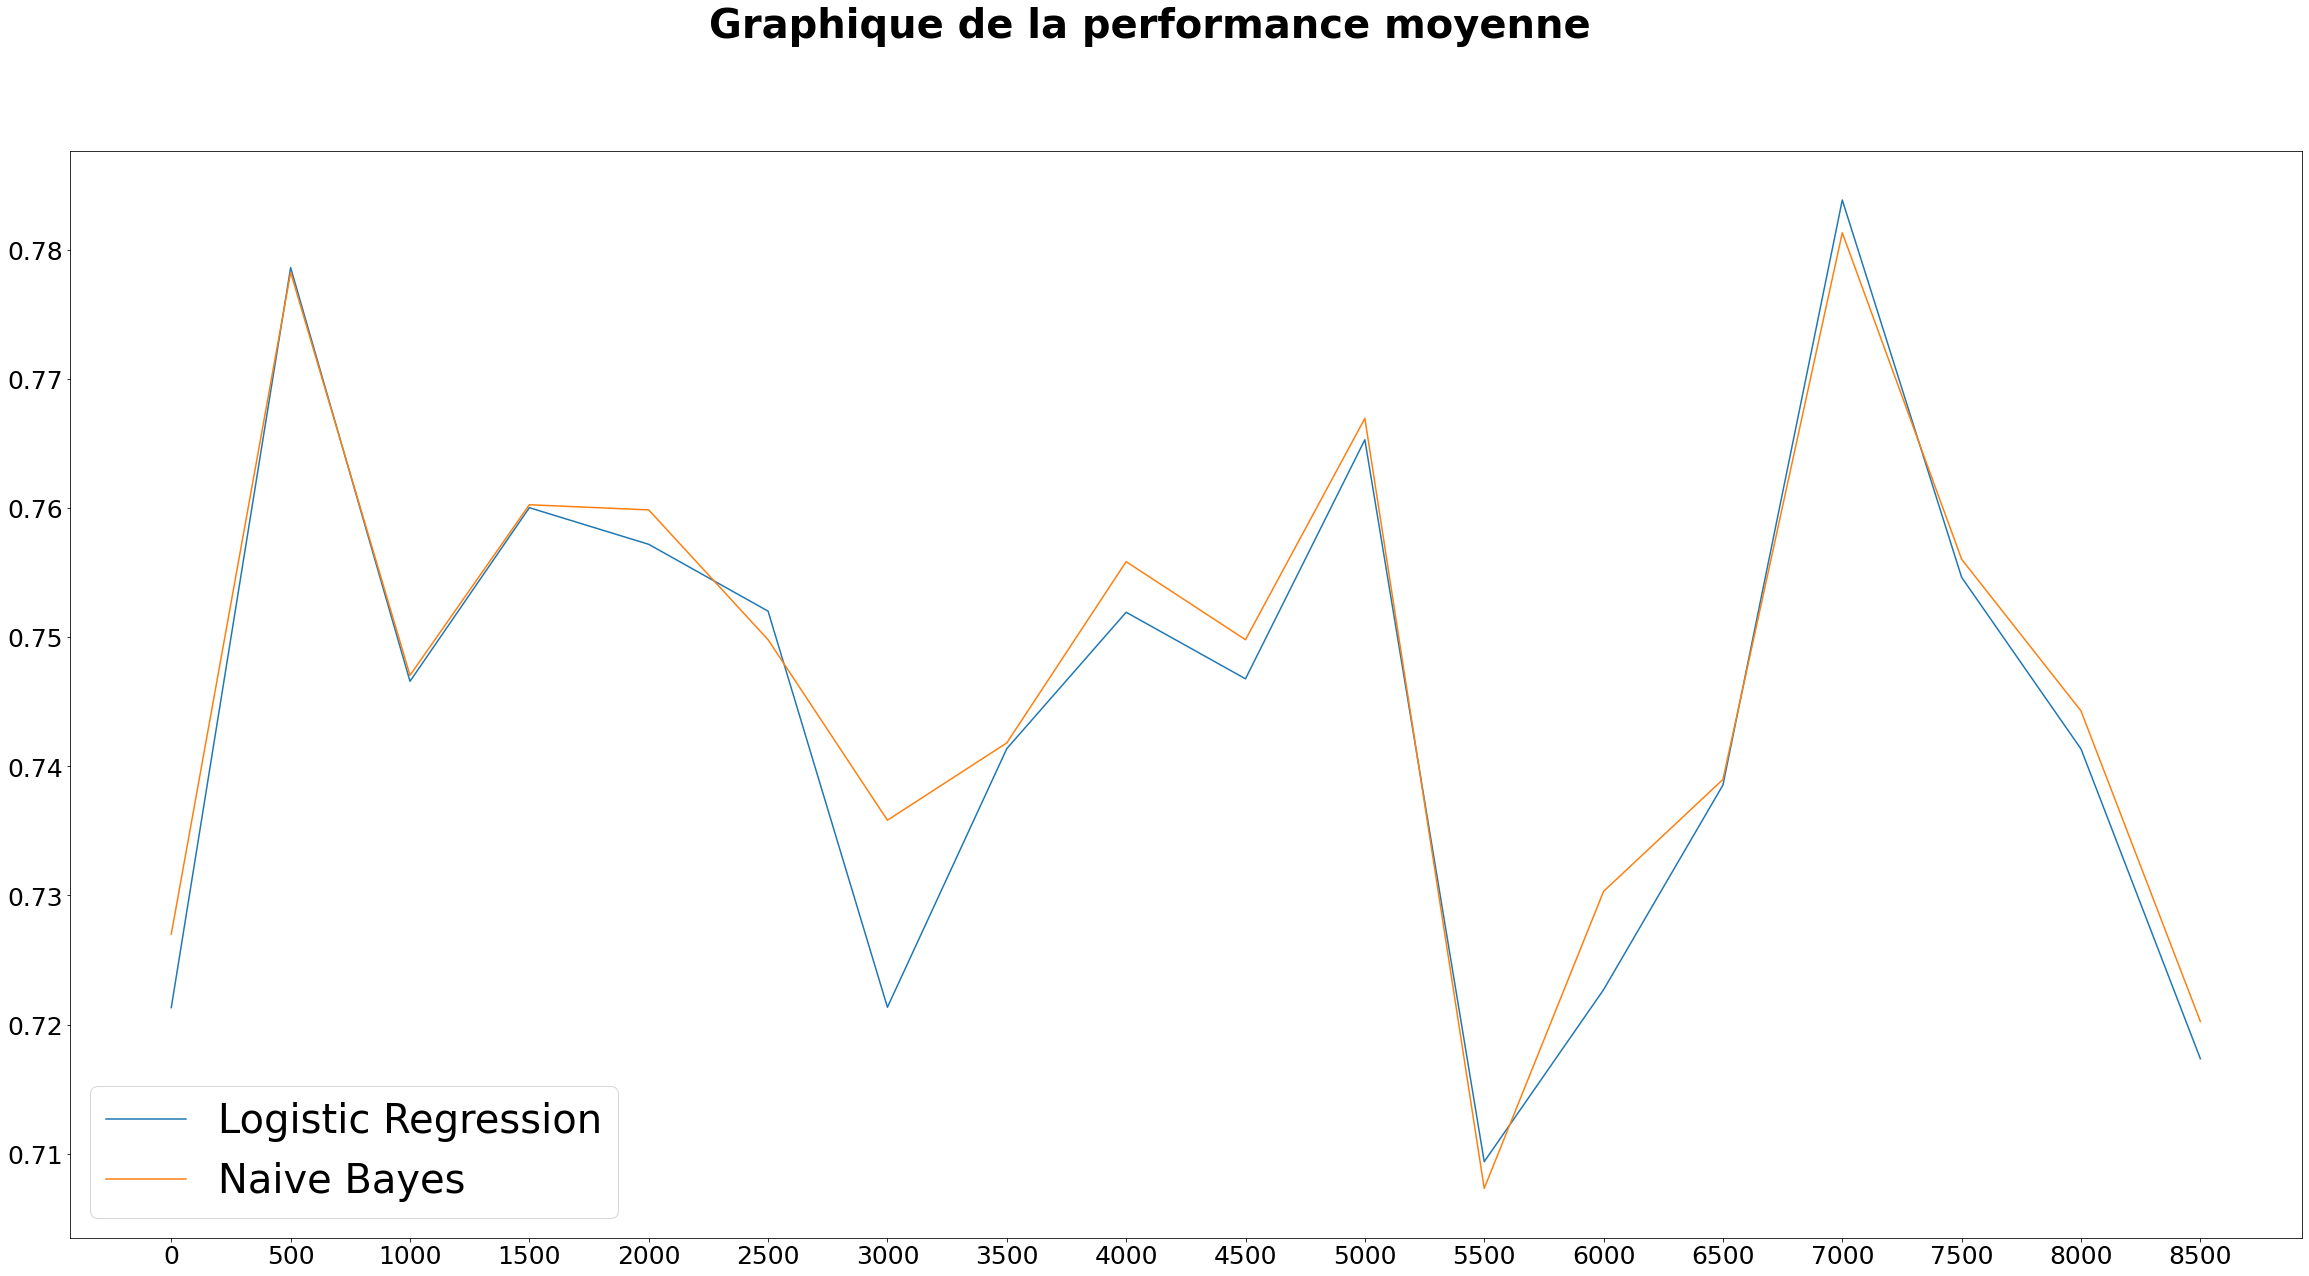

In [70]:
GenerateMeanAccuranciesGraph()

#### c) Que se passe-t-il lorsque le paramètre de régularisation de la régression logisque (C) est augmenté ?

In [ ]:
print("For C = 1.0")
y_pred_regression = logisticsRegression(train_data, test_data,1.0)
print(classification_report(test_data[1], y_pred_regression) + "\n")

print("For C = 2.0")
y_pred_regression = logisticsRegression(train_data, test_data,2.0)
print(classification_report(test_data[1], y_pred_regression) + "\n")

print("For C = 5.0")
y_pred_regression = logisticsRegression(train_data, test_data,5.0)
print(classification_report(test_data[1], y_pred_regression))


In [ ]:
#  Plus le paramètre de régulation logistique (C) augmente, plus la vraisemblance baisse.

# Métrique précision :
# Pour ce qui en est de la précision du sentiment négatif, elle diminue plus le C augmente 
# contaiement à la précision du sentiment positif qui reste relativement stable soit env 0.86

# Métrique recall :
# Pour ce qui en est du rappel du sentiment négatif, il augmente plus le C augmente 
# contaiement au rappel du sentiment positif qui reste relativement stable soit env 0.95

# Métrique f1:
#Quant au f1, il reste relativement constant avec une légère variation pour la classe False quand C= 5.0

#La précision des moyennes micro et macro sont relativement semblables et ne
#varient pas quand le C augmente : 0.83 et 0.84 pour C=1, 0.82 et 0.84 pour C=2, 0.81 et 0.84 pour C=5
#Ceci reflète que l'ensemble des données est relativiement balancées entre les 2 classes. 

## 4. Analyse et discussion

#### a) En considérant les deux types de représentations, répondez aux question suivantes en reportant la question dans le notebook et en inscrivant votre réponse:

#### b) Quel est l’impact de l’annotation de la négation ?

#### c) La suppression des stopwords est-elle une bonne idée pour l’analyse de sentiments ?

#### d) Le stemming et/ou la lemmatisation sont-ils souhaitables dans le cadre de l’analyse de sentiments ?

## 5. Contribution

Complétez la section en haut du notebook indiquant la contribution de chaque membre de l’équipe en indiquant ce qui a été effectué par chaque membre et le pourcentage d’effort du membre dans le TP. 